Dataset is downloaded from here: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

## Data:

#### Poster_Link - Link of the poster that imdb using
#### Series_Title = Name of the movie
#### Released_Year - Year at which that movie released
#### Certificate - Certificate earned by that movie
#### Runtime - Total runtime of the movie
#### Genre - Genre of the movie
#### IMDB_Rating - Rating of the movie at IMDB site
#### Overview - mini story/ summary
#### Meta_score - Score earned by the movie
#### Director - Name of the Director
#### Star1,Star2,Star3,Star4 - Name of the Stars
#### No_of_votes - Total number of votes
#### Gross - Money earned by that movie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Uploading data

In [2]:
df_movies = pd.read_csv('C:/Users/user/Jupyter/my_projects_data/imdb_top_1000.csv')
df_movies.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# delete unnecessary columns
df_movies.drop(columns=['Poster_Link', 'Overview', 'Certificate', 'Runtime', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4'], inplace=True)
df_movies.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,9.3,80.0,2343110,"28,341,469"
1,The Godfather,1972,"Crime, Drama",9.2,100.0,1620367,"134,966,411"
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,84.0,2303232,"534,858,444"
3,The Godfather: Part II,1974,"Crime, Drama",9.0,90.0,1129952,"57,300,000"
4,12 Angry Men,1957,"Crime, Drama",9.0,96.0,689845,"4,360,000"


### View column types and their basic information

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Genre          1000 non-null   object 
 3   IMDB_Rating    1000 non-null   float64
 4   Meta_score     843 non-null    float64
 5   No_of_Votes    1000 non-null   int64  
 6   Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [5]:
df_movies.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


### I see that Gros has an object type, so I change it to a int

In [6]:
df_movies.Gross = df_movies.Gross.replace(',','', regex=True).fillna(0).astype('int64')
df_movies.dtypes

Series_Title      object
Released_Year     object
Genre             object
IMDB_Rating      float64
Meta_score       float64
No_of_Votes        int64
Gross              int64
dtype: object

# 2. General information

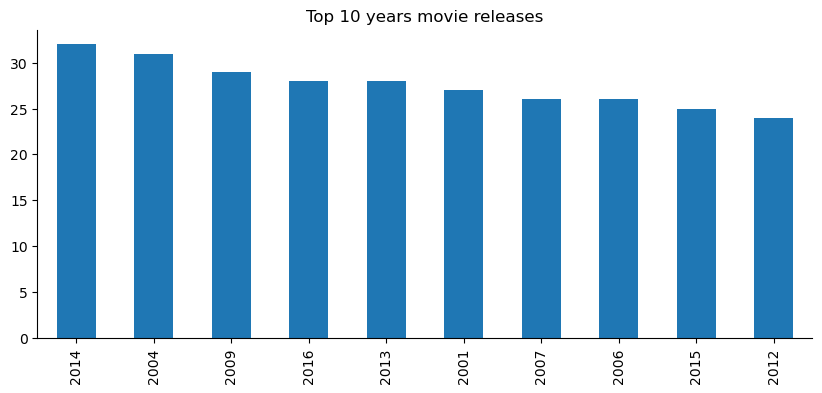

In [7]:
df_movies.groupby('Released_Year') \
    .agg({'Genre': 'count'}) \
    .sort_values('Genre', ascending=False) \
    .head(10).plot(kind='bar', figsize=(10, 4), title='Top 10 years movie releases', legend=False, xlabel='')
sns.despine()

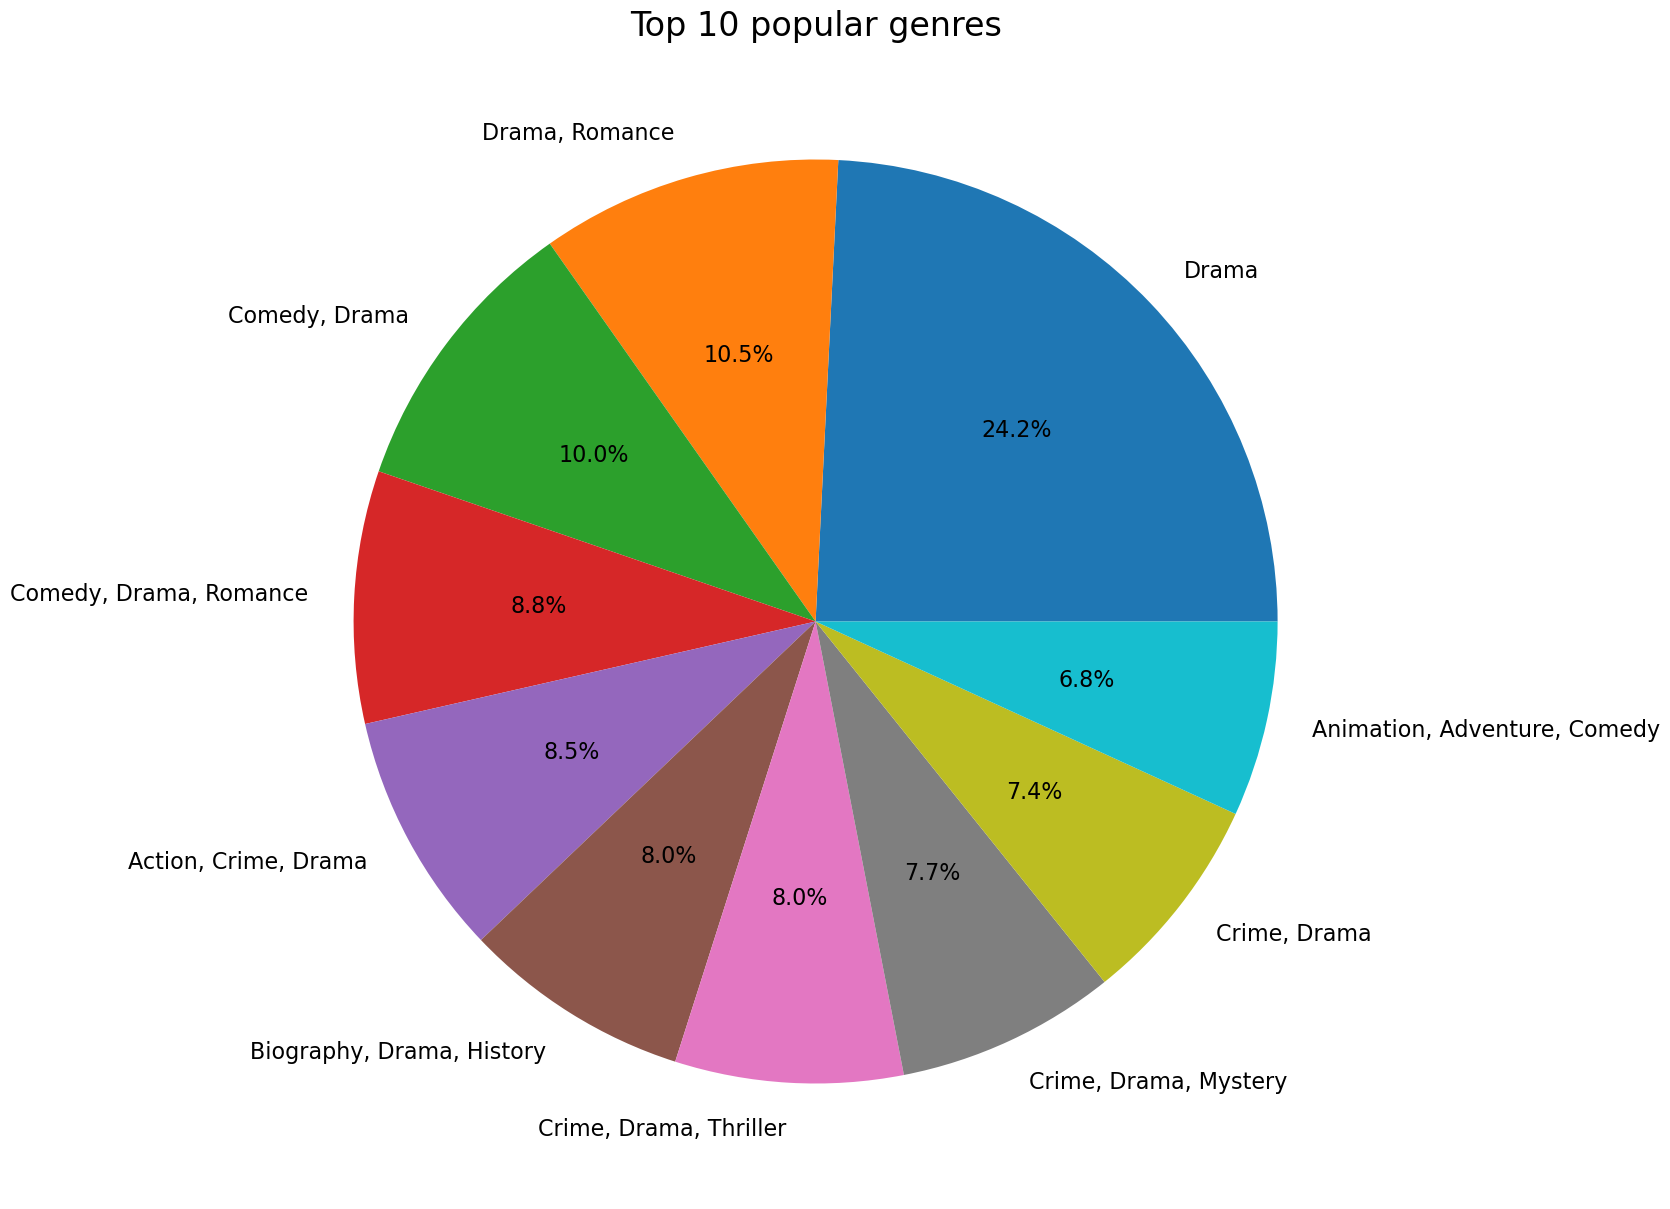

In [8]:
df_movies['Genre'].value_counts().nlargest(10).plot(kind='pie', figsize=(15,15), fontsize=16, \
                                                    ylabel='', autopct='%1.1f%%') \
.set_title('Top 10 popular genres', fontsize=24)
sns.despine()

### The most popular genre is Drama

## 3. Top 10 movies by IMDB rating 

C:\Users\user\AppData\Local\Temp\ipykernel_15088\2360536740.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


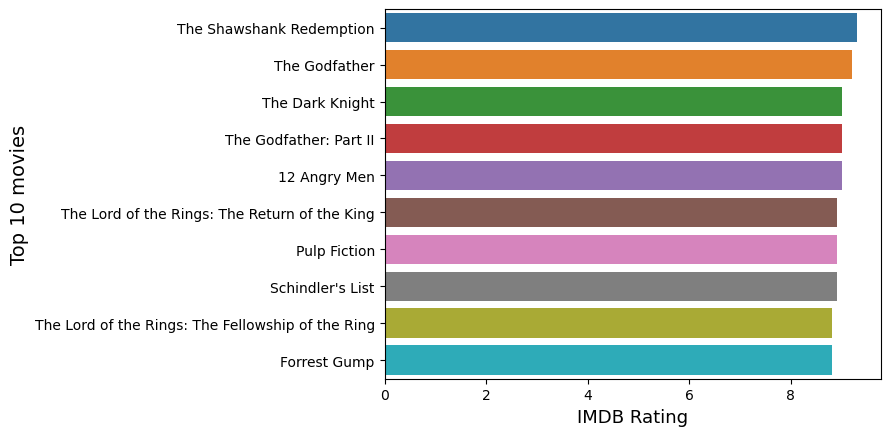

In [9]:
top_df_movies_imdb = df_movies.sort_values('IMDB_Rating',ascending=False).head(10)
ax = sns.barplot (x="IMDB_Rating", y="Series_Title", data=top_df_movies_imdb)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_ylabel('Top 10 movies',fontsize=14)
ax.set_xlabel('IMDB Rating',fontsize=13)
plt.show();

## 4. Top 10 movies by IMDB rating of 2014

C:\Users\user\AppData\Local\Temp\ipykernel_15088\3136393885.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


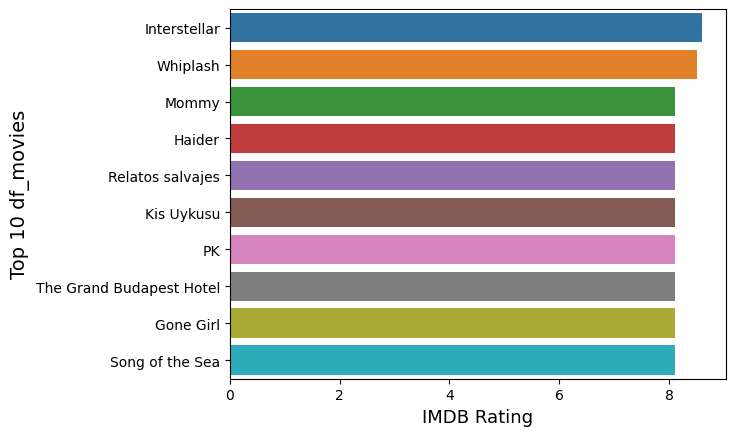

In [10]:
df_movies_2019_imdb = df_movies.query('Released_Year == "2014"').sort_values('IMDB_Rating', ascending=False).head(10)
ax = sns.barplot (x="IMDB_Rating", y="Series_Title", data=df_movies_2019_imdb)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_ylabel('Top 10 df_movies',fontsize=14)
ax.set_xlabel('IMDB Rating',fontsize=13)
plt.show();

## 5. Top 10 movies by Metascore rating

C:\Users\user\AppData\Local\Temp\ipykernel_15088\1606099796.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


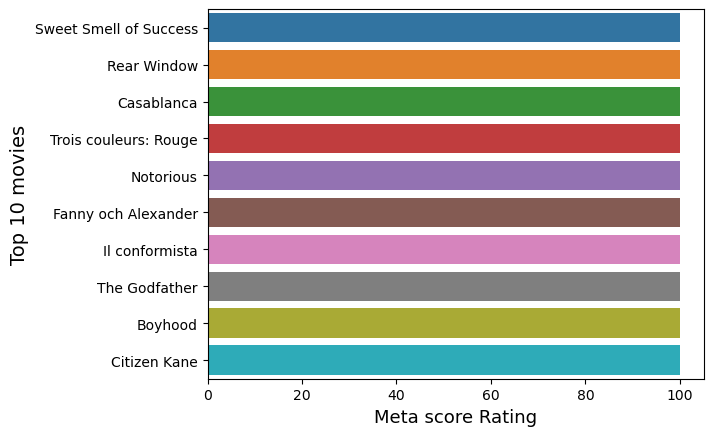

In [11]:
top_df_movies_metascore = df_movies.sort_values('Meta_score',ascending=False).head(10)
ax = sns.barplot (x="Meta_score", y="Series_Title", data=top_df_movies_metascore)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_ylabel('Top 10 movies',fontsize=14)
ax.set_xlabel('Meta score Rating',fontsize=13)
plt.show();

## 6. Top 10 movies by Metascore rating of 2014

C:\Users\user\AppData\Local\Temp\ipykernel_15088\1451459885.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


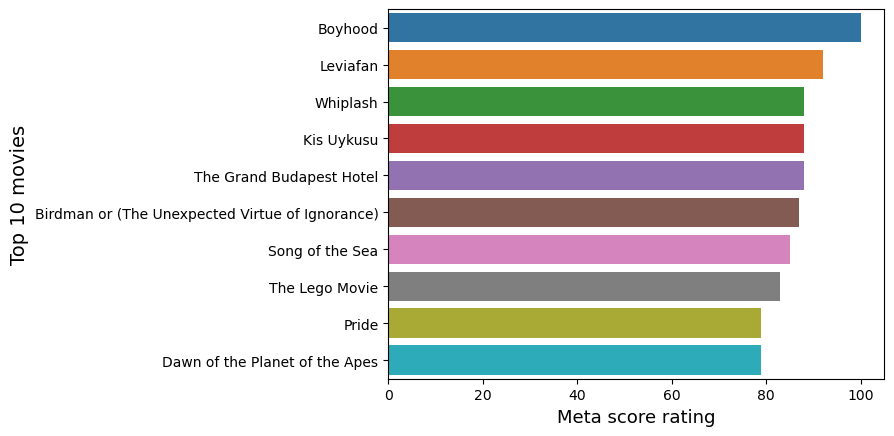

In [12]:
df_movies_2019_metascore = df_movies.query('Released_Year == "2014"').sort_values('Meta_score', ascending=False).head(10)
ax = sns.barplot (x="Meta_score", y="Series_Title", data=df_movies_2019_metascore)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_ylabel('Top 10 movies',fontsize=14)
ax.set_xlabel('Meta score rating',fontsize=13)
plt.show();

## 7. Top 10 movies by votes

C:\Users\user\AppData\Local\Temp\ipykernel_15088\1831995500.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, )


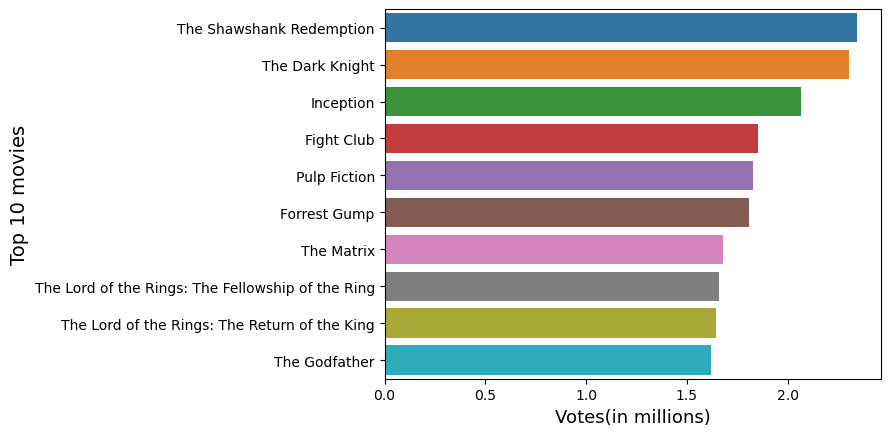

In [13]:
top_df_movies_metascore = df_movies.sort_values('No_of_Votes',ascending=False).head(10)
ax = sns.barplot (x="No_of_Votes", y="Series_Title", data=top_df_movies_metascore)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, )
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_ylabel('Top 10 movies',fontsize=14)
ax.set_xlabel('Votes(in millions)',fontsize=13)
plt.show();

## 8. Top 10 movies by box office grosses

C:\Users\user\AppData\Local\Temp\ipykernel_15088\2044257164.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10,)


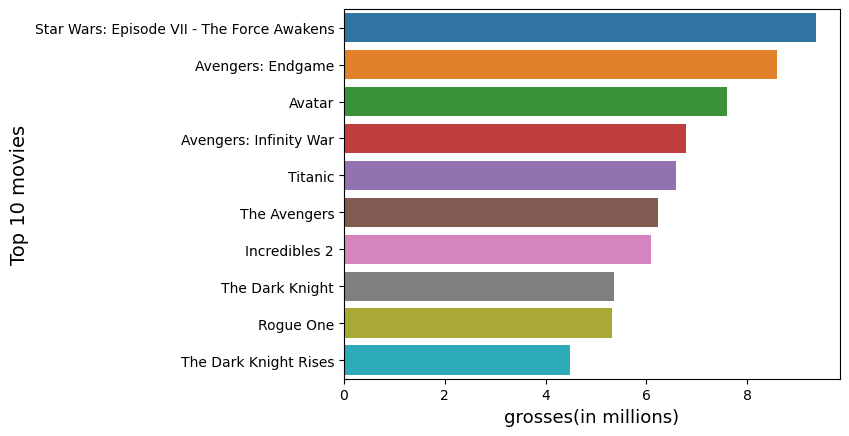

In [14]:
top_df_movies_metascore = df_movies.sort_values('Gross',ascending=False).head(10)
ax = sns.barplot (x="Gross", y="Series_Title", data=top_df_movies_metascore)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10,)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_ylabel('Top 10 movies',fontsize=14)
ax.set_xlabel('grosses(in millions)',fontsize=13)
plt.show();